In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the dataset from the provided URL
data = pd.read_csv("C:\\Users\\User\\Downloads\\Churn_Modelling.csv")
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check for missing values
print(data.isnull().sum())

# Encode categorical variables
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Feature scaling
scaler = StandardScaler()
data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])

# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


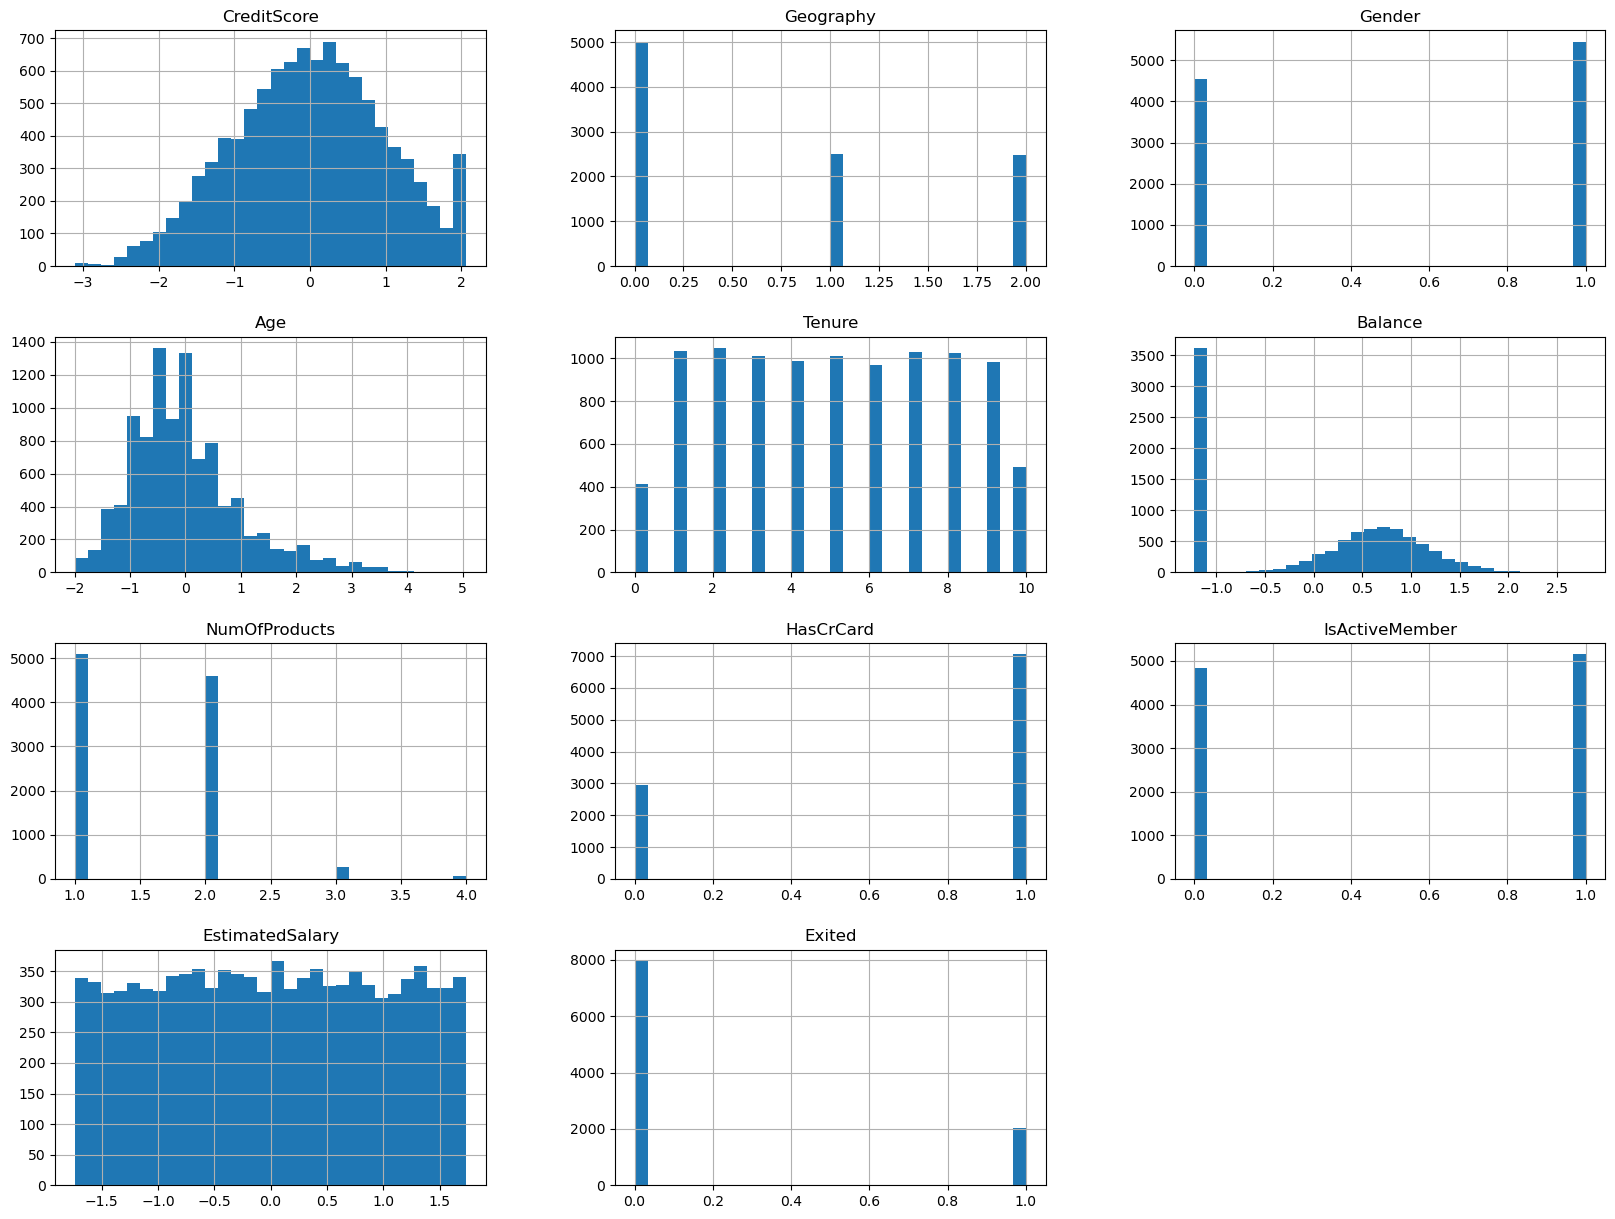

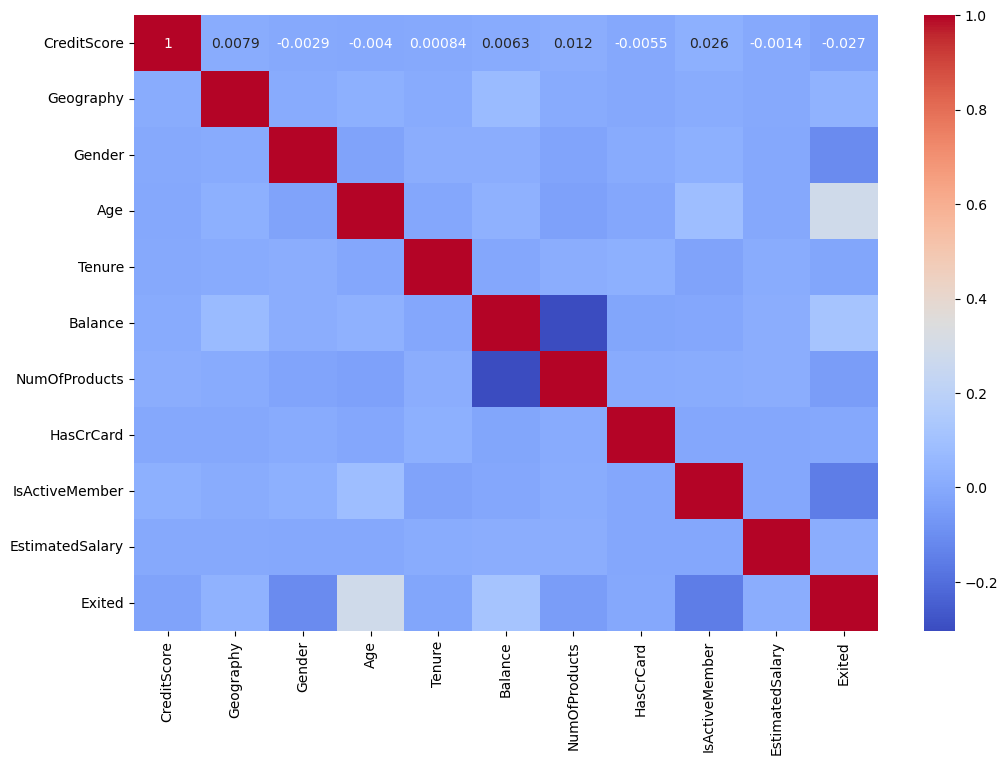

In [4]:
# Plot distributions of numerical features
data.hist(bins=30, figsize=(20,15))
plt.show()

# Plot correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [5]:
# Define features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)



In [7]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)




In [8]:
# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)

In [9]:
# Logistic Regression Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))



Logistic Regression:
Accuracy: 0.815
Confusion Matrix:
 [[1559   48]
 [ 322   71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [10]:
# Random Forest Evaluation
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest:
Accuracy: 0.8645
Confusion Matrix:
 [[1546   61]
 [ 210  183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [11]:
# Gradient Boosting Evaluation
print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting:
Accuracy: 0.8655
Confusion Matrix:
 [[1547   60]
 [ 209  184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

